# Atul Tiwari

# importing data
## Importing neccessory libraries
pandas for reading and writing file,seaborn and matplotlib for visualization, sklearn for machine learning

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.decomposition import PCA

# Understanding data

In [265]:
df = pd.read_csv('Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [266]:
print("we have",df.shape[0],'rows and',df.shape[1],'columns')

we have 7043 rows and 21 columns


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [268]:
# Here we can see that the column 'TotalCahrges' is of type 'object' while it should be of an integer type

In [269]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [270]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [271]:
#changing the type of 'TotalCharges' left 11 rows empty, so getting rid of those rows:

In [272]:
df.dropna(inplace=True)

# Data Manipulation

In [273]:
#dropping the customerID column as it's not needed 

In [274]:
df.drop('customerID', inplace=True, axis=1)

In [275]:
#Encoding the 'Chrun' column to have 1 represent Yes and 0 represent No as it is our target variable.

In [276]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [277]:
#Now that the target varaible is encoded, we can convert the rest of the variables into dummies to have a better understanding of the data.

In [278]:
encoded_df = pd.get_dummies(df)
encoded_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


# Data Visualization

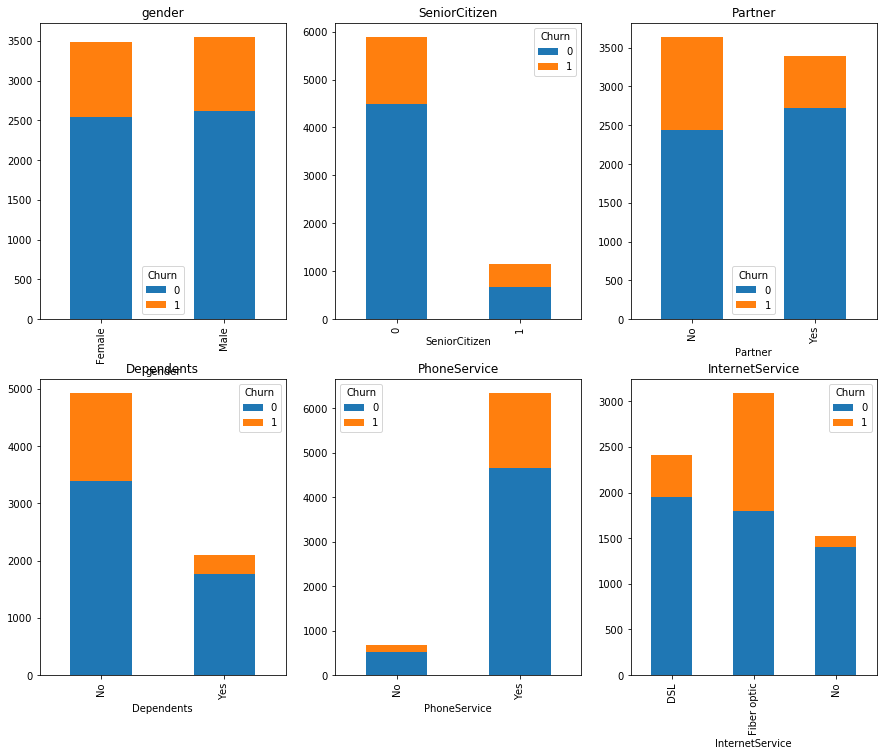

In [279]:
feature = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService']
fig, a = plt.subplots(2, 3)
for i, col in enumerate(feature):
    if i<3:
        ax = df.groupby([col, 'Churn']).size().unstack().plot(kind='bar', stacked=True, ax=a[0, i], figsize=(15, 12))
    elif i>=3 and i<6:
        ax = df.groupby([col, 'Churn']).size().unstack().plot(kind='bar', stacked=True, ax=a[1, i-3], figsize=(15, 12))
    ax.set_title(col)

In [280]:
#Gender: The Gender distribution is balanced and doesn't seem to have much affect on the churn rate.

#Senior Citizen: Senior Citizens are more likely to churn at a significantly higher rate.

#Partner/Dapendents: Customers who do not have any partners or Dependents tend to churn more.

#Phone Service: Evidently, people who have Phone Service are churning more.

#Internet Service: People with Internet Services tend to churn more than those who don't. In that too, customer with DSL service are churning more

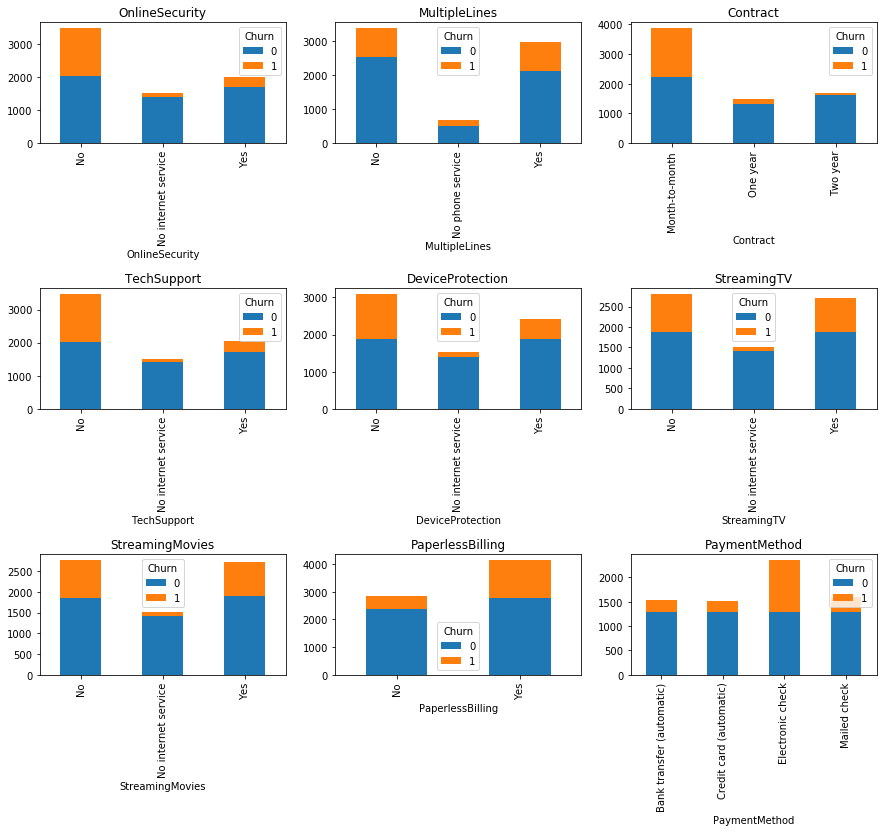

In [281]:
feature = ['OnlineSecurity', 'MultipleLines', 'Contract', 'TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
fig, a = plt.subplots(3, 3)
fig.subplots_adjust(hspace=1.2)
for i, col in enumerate(feature):
    if i<3:
        ax = df.groupby([col, 'Churn']).size().unstack().plot(kind='bar', stacked=True, ax=a[0, i], figsize=(15, 12))
    elif i>=3 and i<6:
        ax = df.groupby([col, 'Churn']).size().unstack().plot(kind='bar', stacked=True, ax=a[1, i-3], figsize=(15, 12))
    elif i>=6 and i<=9:
        ax = df.groupby([col, 'Churn']).size().unstack().plot(kind='bar', stacked=True, ax=a[2, i-6], figsize=(15, 12))
    ax.set_title(col)

In [282]:
#Now if we look at the services which require an internet service, customers who do not have these services tend to churn more than customers who do have these services or do not have internet access at all

In [283]:
#Customers who have a two year contract have very minimal churning rate

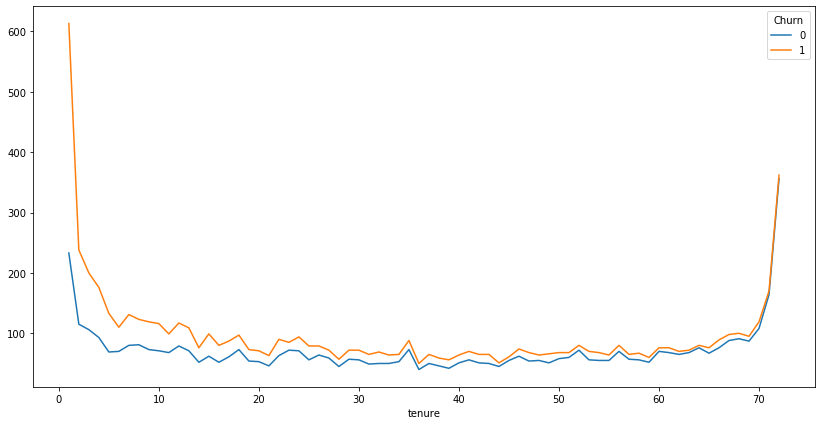

In [284]:
df.groupby(['tenure', 'Churn']).size().unstack().plot(kind='line', stacked=True, figsize=(14, 7))

# The newer customer tend to churn more It doesn't seem that the tenure affects the churn rate much other than that.

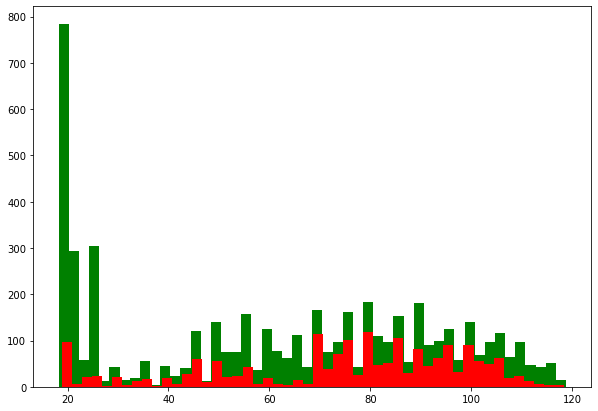

In [285]:
plt.figure(figsize=(10, 7))
c0 = df[df['Churn']==0]
c1 = df[df['Churn']==1]
plt.hist(c0['MonthlyCharges'], bins=50, color='green')
plt.hist(c1['MonthlyCharges'], bins=50, color='red')
plt.show()

In [286]:
# the monthly charges higher than churning rate higher

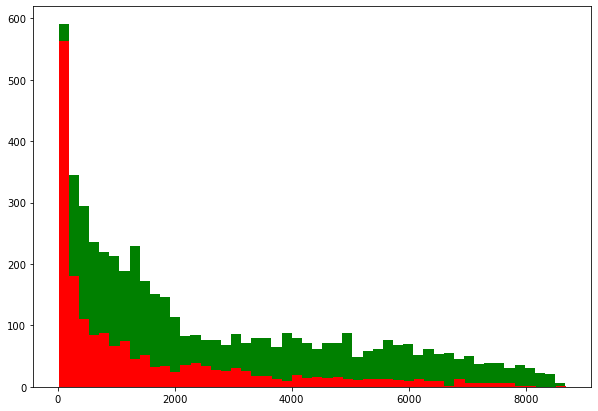

In [287]:
plt.figure(figsize=(10, 7))
c0 = df[df['Churn']==0]
c1 = df[df['Churn']==1]
plt.hist(c0['TotalCharges'], bins=50, color='green')
plt.hist(c1['TotalCharges'], bins=50, color='red')
plt.show()

## The churn rate is higher when the total charges are lower
## Implement Machine Learning Model

In [288]:
#separating the dependant and independant variables
x = encoded_df.drop('Churn', axis=1) 
y = encoded_df['Churn'].values

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.4) #splitting the test and train data
ss = StandardScaler() #scaling the features down using the standard scaler method
x_train = pd.DataFrame(ss.fit_transform(x_train))
x_test = pd.DataFrame(ss.fit_transform(x_test))

In [290]:
#Fitting the Logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [291]:
lr_pred = lr.predict(x_test)

In [292]:
#Fitting the SVM Model
svm = SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [293]:
svm_pred = svm.predict(x_test)

# Machine learning Tuning parameters

In [294]:
param_svm={
    "C":[0.1,0.01,0.001],
    "kernel":["rbf",'linear'],
    "gamma":[1,10,100],
    'tol':[0.001,0.01,0.1]
}

param_clf={
    "criterion":['gini','entropy'],
    "splitter":["best",'random'],
    "max_depth":[2,4,6,8,10,12,14,16],
    "min_samples_split":[2,4,6,8,10],
    "min_samples_leaf":[1,2,3,4],
    }

In [295]:
clf=DecisionTreeClassifier()

In [296]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [297]:
clf_pred=clf.predict(x_test)

# Tuning the model

In [298]:
grid_svc=GridSearchCV(svm,param_grid=param_svm,scoring="accuracy",cv=4)

In [299]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 0.001], 'gamma': [1, 10, 100],
                         'kernel': ['rbf', 'linear'],
                         'tol': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [300]:
grid_svc.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'linear', 'tol': 0.01}

In [301]:
svc2 = SVC(C=0.01,gamma =1, kernel='linear',tol=0.01)
svc2.fit(x_train, y_train)
y_pred= svc2.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8005687877710629


In [302]:
grid_svc=GridSearchCV(clf,param_grid=param_clf,scoring="accuracy",cv=4)

In [303]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [304]:
grid_svc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [305]:
clf2=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf= 1,min_samples_split=4,splitter= 'random')
clf2.fit(x_train,y_train)
y_pred=clf2.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7877710629221472


In [306]:
print('Model Accuracies')
print('Logistic Regression: ',metrics.accuracy_score(y_test, lr_pred))
print('Support Vector Machine: ',metrics.accuracy_score(y_test, svm_pred))
print('Decision Tree: ',metrics.accuracy_score(y_test, clf_pred))

Model Accuracies
Logistic Regression:  0.8012797724848916
Support Vector Machine:  0.7945254177035194
Decision Tree:  0.7052968361180235


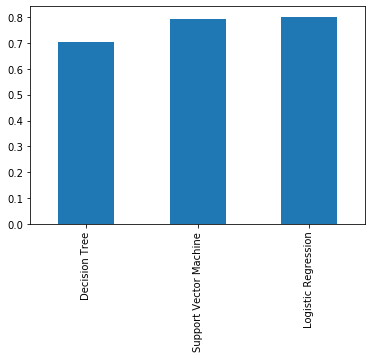

In [307]:
models = ['Logistic Regression','Support Vector Machine','Decision Tree']
accuracies = [metrics.accuracy_score(y_test, lr_pred),metrics.accuracy_score(y_test, svm_pred),metrics.accuracy_score(y_test, clf_pred)]
acc_scores = pd.Series(accuracies, index=models)
acc_scores.sort_values().plot(kind='bar')

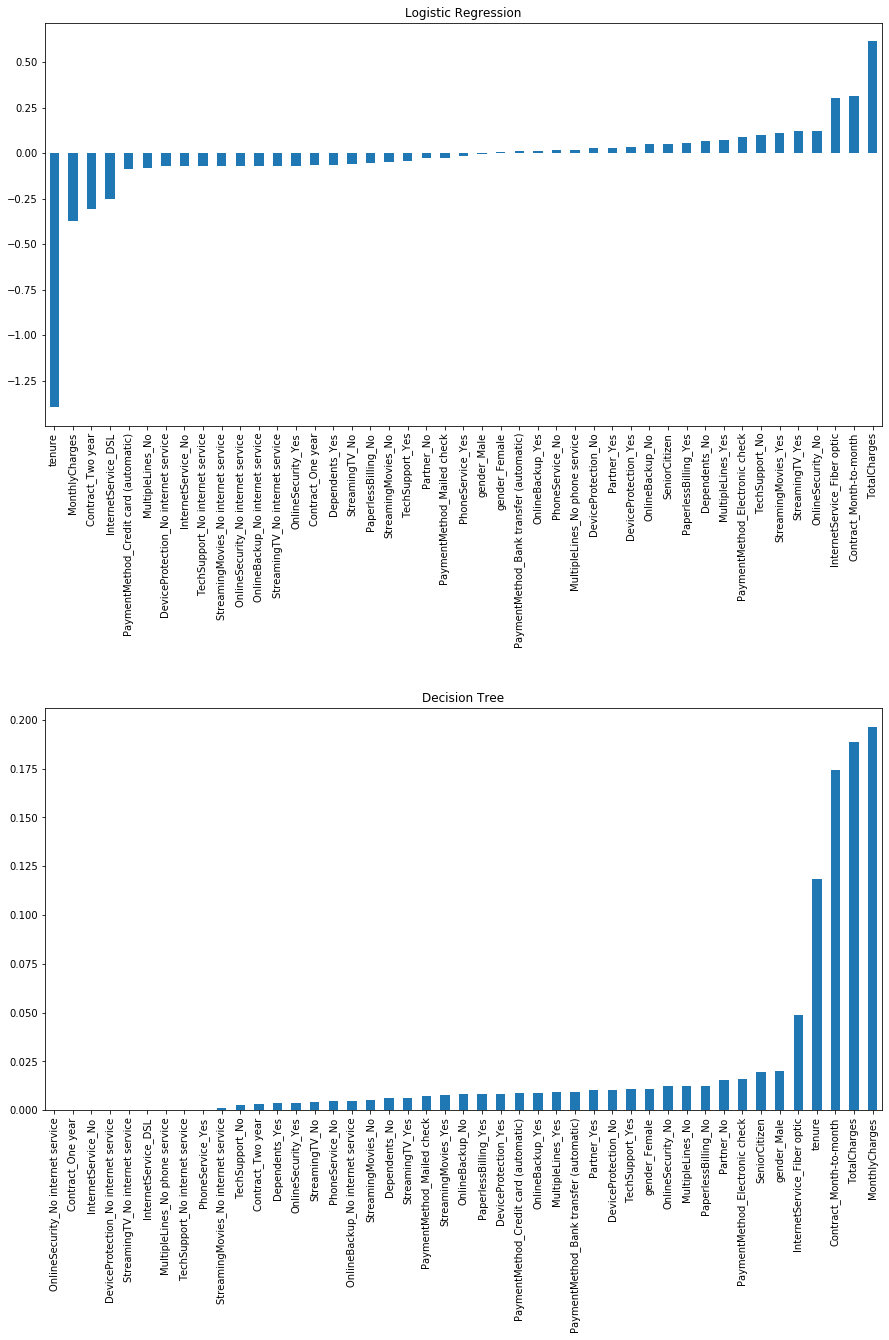

In [311]:
fig, a = plt.subplots(2,figsize=(15, 20))
fig.subplots_adjust(hspace=0.7)

reg_importances = pd.Series(lr.coef_[0], index=x.columns.values)
ax = reg_importances.sort_values().plot(kind='bar', ax=a[0], title='Logistic Regression')

decision_importance=pd.Series(clf.feature_importances_,index=x.columns.values)
ax=decision_importance.sort_values().plot(kind='bar',title='Decision Tree')



# Final Conclusions

# CONCLUSION:

# Fiber Optic Internet Service, Movie Streaming, TV Streaming, Month to Month Contract, Senior Citizen, E Cheque payment method have a positive impact of the churning, meaning they encourange customer to churn.

# Monthly Caharges, Tenure, DSL Internet Service and NOT having Internet Service etc have a negative impact on churning

# According to these insights, the company should encourage their customers to get internet service from them as it seems to have a negative impact on the customer churning.
And the comany needs to look into issues with the fiber optic internet service, TV Streaming, Movie Streaming and customers who pay with E Cheque and have a Month to Month Contract as they seem to make the customers leave the most.